# Example of eSQG reconstruction 
## from NATL60 SSH map in Azores region

In [1]:
import numpy as np
import pylab as plt
import sys, os 
import xarray as xr 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import pydssa.class_vertical_reconstruction as vr

## 1. Download SSH field and depth

In [3]:
path_ssh = '../data/Surf_fields/NATL60OSMO-CJM165_y2012m06d14-y2013m10d01.1d_SST-SSH.nc'    
with xr.open_dataset(path_ssh, mask_and_scale=True) as (ds_2):   
        ssh = np.zeros_like(ds_2.sossheig[0,20:-20,20:-20])  
        day0 = 0 # y2012m06d14
        ssh[:,:] = ds_2.sossheig[day0,20:-20,20:-20] 
        lon = np.zeros_like(ds_2.nav_lon[20:-20,20:-20]) 
        lon[:,:] = ds_2.nav_lon[20:-20,20:-20] 
        lat = np.zeros_like(ds_2.nav_lat[20:-20,20:-20]) 
        lat[:,:] = ds_2.nav_lat[20:-20,20:-20] 
ssh = np.ma.masked_invalid(ssh)

depth = []
with open('../data/NATL60_depth.txt') as fp:
    for cnt, line in enumerate(fp):
        if cnt != 0 and cnt < 109:
            depth.append(np.float(line.strip()))
             

## 2. Create an ocean reconstruction instance

In [4]:
my_esqg_reconstruction = vr.vertical_reconstruction()

## 3. Enter reconstruction parameters

In [5]:
my_esqg_reconstruction.ssh = ssh 
my_esqg_reconstruction.lon = lon
my_esqg_reconstruction.lat = lat 
my_esqg_reconstruction.z = depth
f0 = 2*2*np.pi/86164*np.sin(lat*np.pi/180)
my_esqg_reconstruction.N0 = 15*f0                                    
my_esqg_reconstruction.C = 3                                     
my_esqg_reconstruction.sppad = 3
my_esqg_reconstruction.Nprofile = np.ones_like(depth) 

## 4. Run the eSQG reconstruction 

In [6]:
my_esqg_reconstruction.run_esqg()

## 5. Plot the reconstructed variables

Plotting surface variable
SSD anomaly is not available for plotting
SST anomaly is not available for plotting
Geo. kin. def. is not available for plotting
Plotting 3D variables


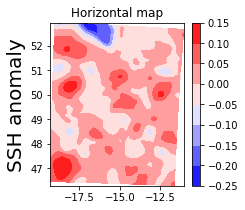

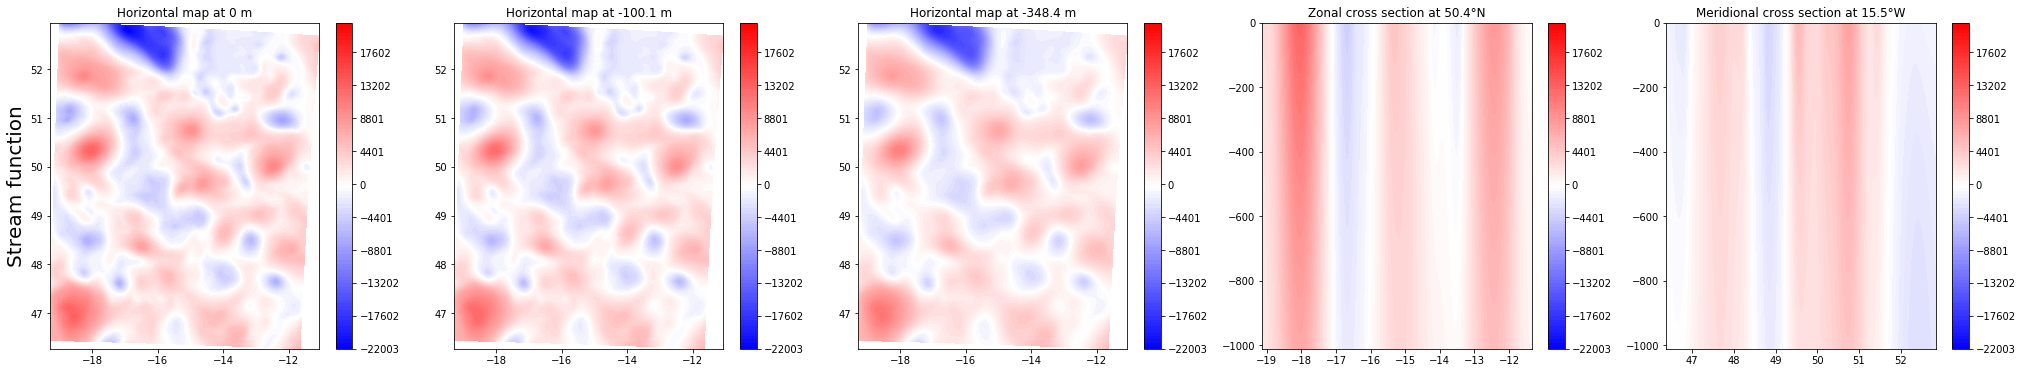

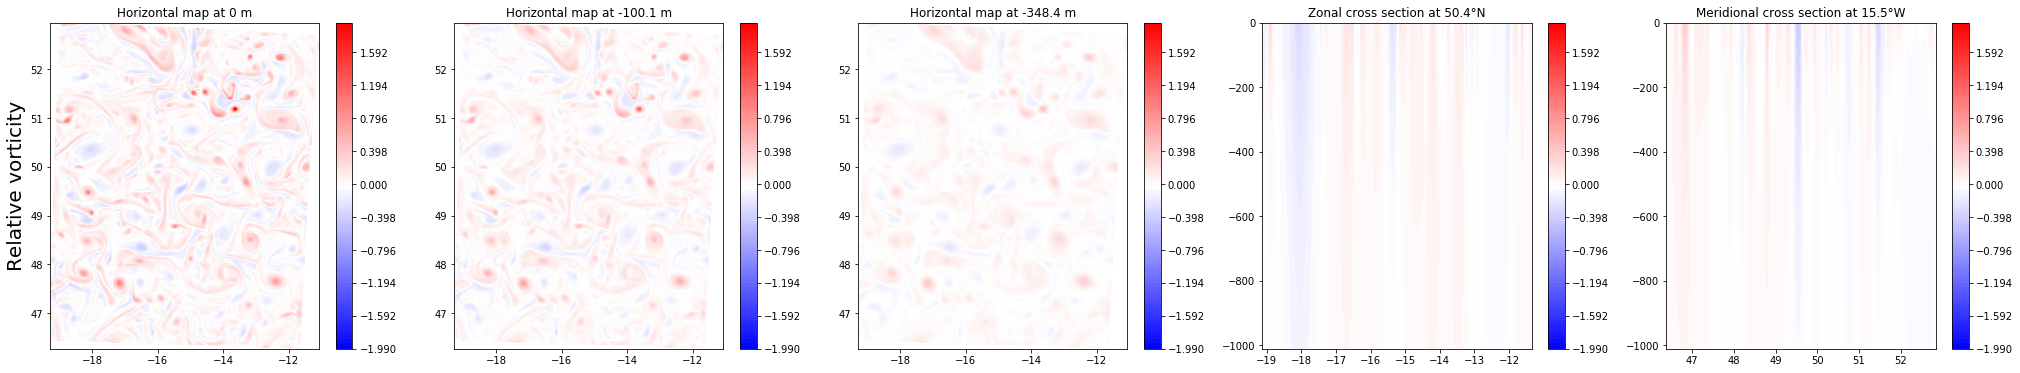

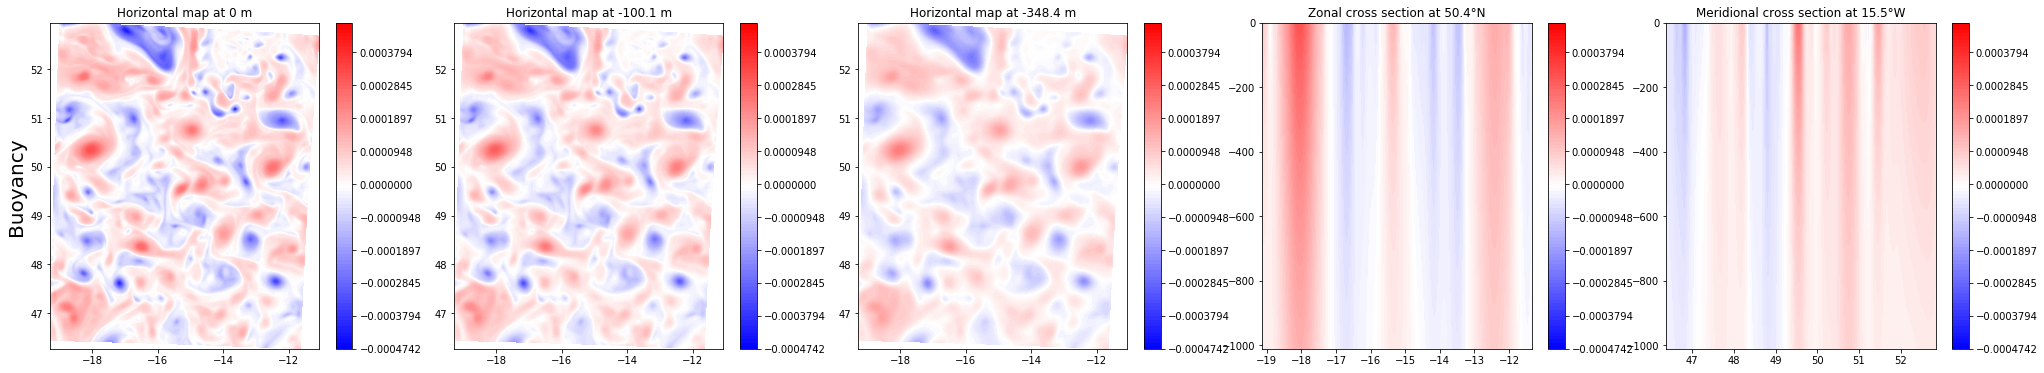

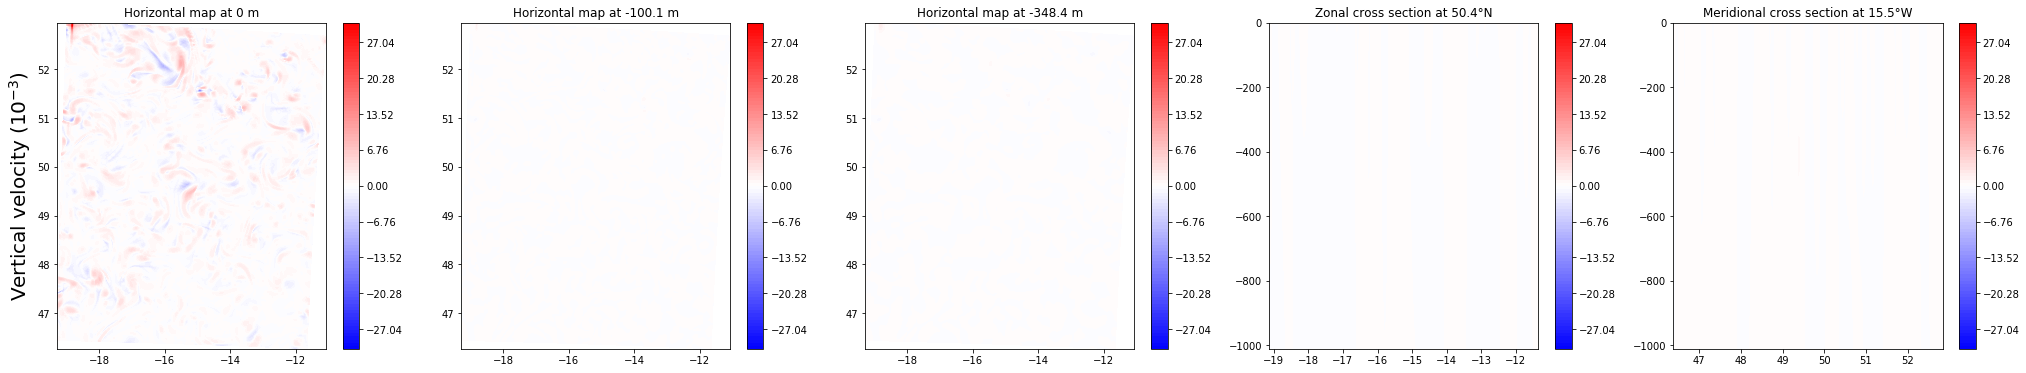

In [7]:
my_esqg_reconstruction.plot_reconstruction_outputs(crop1 = 100, crop2 = -200, crop3 = 20, crop4 = -20)

## 6. Compare reconstructed w to the reference

In [8]:
path_ref = '../data/Reference/NATL60OSM-CJM165_y2012m06d14.1d_W.nc'    
with xr.open_dataset(path_ref, mask_and_scale=True) as (ds_2):   
        w_ref = np.zeros_like(ds_2.vovecrtz[0,:my_esqg_reconstruction.nz,:,:])    
        w_ref[:,:] = ds_2.vovecrtz[0,:my_esqg_reconstruction.nz,:,:] 
        lon_ref = np.zeros_like(ds_2.nav_lon[:,:] )   
        lon_ref[:,:] = ds_2.nav_lon[:,:]   
        lat_ref = np.zeros_like(ds_2.nav_lat[:,:] )   
        lat_ref[:,:] = ds_2.nav_lat[:,:]    
        
w_ref = np.ma.masked_invalid(w_ref)


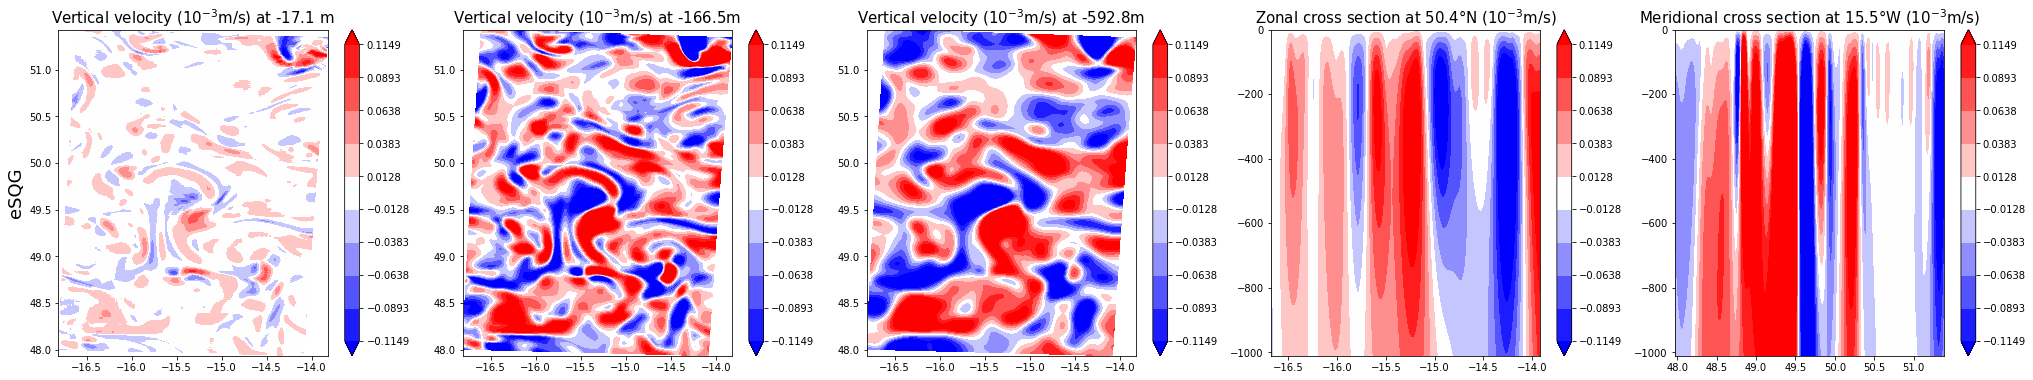

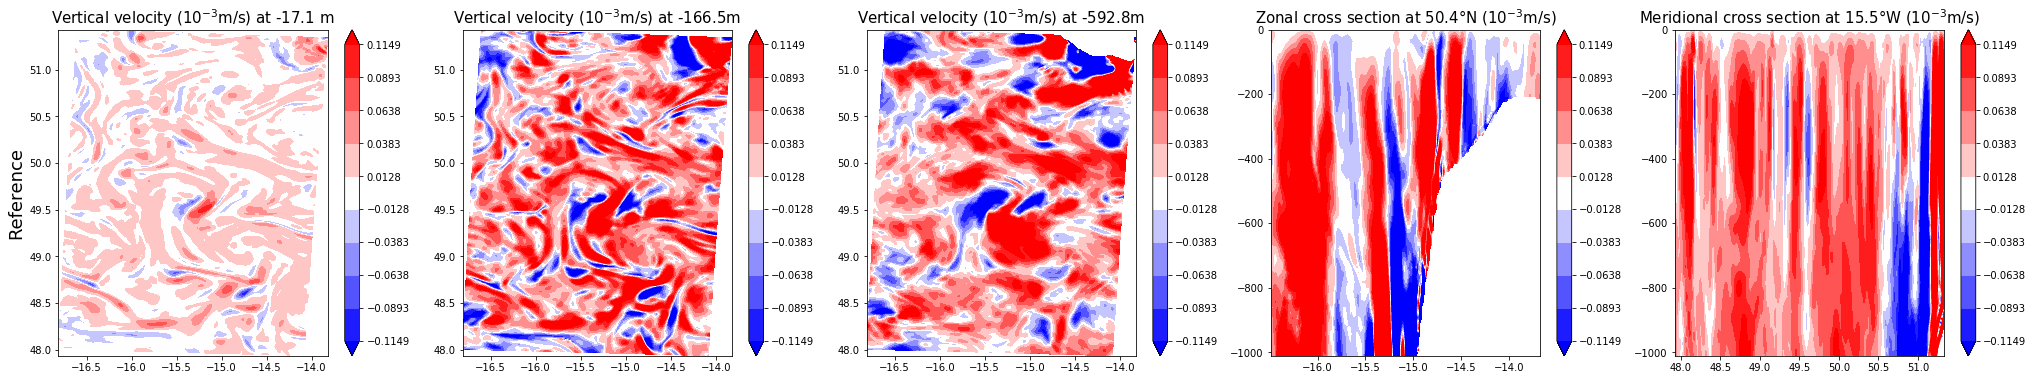

In [9]:
# Cropping reconstructed w
crop1 = 235
crop2 = -331
crop3 = 161
crop4 = -168

# Cropping reference w
crop5 = 2
crop6 = -161
crop7 = 69
crop8 = -149

# Computing levels from w_ref max
max_var = np.max(np.abs(w_ref[10,crop5:crop6,crop7:crop8]*1e3)) 
levs = np.linspace(-max_var,max_var, 10)

# Prescribing 3 depths (indices) to plot 
depth0 = 10
depth1 = 40
depth2 = 80

# Prescribing meridional and zonal cross to plot
lon_cross = int(my_esqg_reconstruction.ny/2)
lat_cross = int(my_esqg_reconstruction.nx/2)

plt.figure(figsize=(35,6))
plt.subplot(151)
plt.contourf(my_esqg_reconstruction.lon[crop1:crop2,crop3:crop4],my_esqg_reconstruction.lat[crop1:crop2,crop3:crop4],my_esqg_reconstruction.vertvel[crop1:crop2,crop3:crop4,depth0],cmap=plt.cm.get_cmap('bwr'),levels=levs,extend='both')
plt.colorbar() 
plt.ylabel('eSQG',fontsize=18)
plt.title('Vertical velocity (10$^{-3}$m/s) at '+str("%.1f" %my_esqg_reconstruction.z[depth0])+' m',fontsize=15)
plt.subplot(152) 
levs = np.linspace(-max_var,max_var, 10)
plt.contourf(lon[crop1:crop2,crop3:crop4],my_esqg_reconstruction.lat[crop1:crop2,crop3:crop4],my_esqg_reconstruction.vertvel[crop1:crop2,crop3:crop4,depth1],cmap=plt.cm.get_cmap('bwr'),levels=levs,extend='both')
plt.colorbar()
plt.title('Vertical velocity (10$^{-3}$m/s) at '+str("%.1f" %my_esqg_reconstruction.z[depth1])+'m',fontsize=15)
plt.subplot(153) 
levs = np.linspace(-max_var,max_var, 10)
plt.contourf(my_esqg_reconstruction.lon[crop1:crop2,crop3:crop4],my_esqg_reconstruction.lat[crop1:crop2,crop3:crop4],my_esqg_reconstruction.vertvel[crop1:crop2,crop3:crop4,depth2],cmap=plt.cm.get_cmap('bwr'),levels=levs,extend='both')
plt.colorbar() 
plt.title('Vertical velocity (10$^{-3}$m/s) at '+str("%.1f" %my_esqg_reconstruction.z[depth2])+'m',fontsize=15)
plt.subplot(154)
plt.contourf(my_esqg_reconstruction.lon[lat_cross,crop3:crop4],my_esqg_reconstruction.z[:],np.transpose(my_esqg_reconstruction.vertvel[lat_cross,crop3:crop4,:]),cmap=plt.cm.get_cmap('bwr'),levels=levs,extend='both')
plt.colorbar()
plt.title('Zonal cross section at '+str("%.1f" % my_esqg_reconstruction.lat[lat_cross,1])+'°N (10$^{-3}$m/s)',fontsize=15)
plt.subplot(155)
plt.contourf(my_esqg_reconstruction.lat[crop1:crop2,lon_cross],my_esqg_reconstruction.z[:],np.transpose(my_esqg_reconstruction.vertvel[crop1:crop2,lon_cross,:]),cmap=plt.cm.get_cmap('bwr'),levels=levs,extend='both')
plt.colorbar()
plt.title('Meridional cross section at '+str("%.1f" % np.abs(my_esqg_reconstruction.lon[1,lon_cross]))+'°W (10$^{-3}$m/s)',fontsize=15)
  
plt.figure(figsize=(35,6))
plt.subplot(151)
plt.contourf(lon_ref[crop5:crop6,crop7:crop8],lat_ref[crop5:crop6,crop7:crop8],w_ref[depth0,crop5:crop6,crop7:crop8]*1e3,cmap=plt.cm.get_cmap('bwr'),levels=levs,extend='both')
plt.colorbar() 
plt.ylabel('Reference',fontsize=18)
plt.title('Vertical velocity (10$^{-3}$m/s) at '+str("%.1f" %my_esqg_reconstruction.z[depth0])+' m',fontsize=15)
plt.subplot(152)
plt.contourf(lon_ref[crop5:crop6,crop7:crop8],lat_ref[crop5:crop6,crop7:crop8],w_ref[depth1,crop5:crop6,crop7:crop8]*1e3,cmap=plt.cm.get_cmap('bwr'),levels=levs,extend='both')
plt.colorbar()
plt.title('Vertical velocity (10$^{-3}$m/s) at '+str("%.1f" %my_esqg_reconstruction.z[depth1])+'m',fontsize=15)
plt.subplot(153)
plt.contourf(lon_ref[crop5:crop6,crop7:crop8],lat_ref[crop5:crop6,crop7:crop8],w_ref[depth2,crop5:crop6,crop7:crop8]*1e3,cmap=plt.cm.get_cmap('bwr'),levels=levs,extend='both')
plt.colorbar() 
plt.title('Vertical velocity (10$^{-3}$m/s) at '+str("%.1f" %my_esqg_reconstruction.z[depth2])+'m',fontsize=15)
plt.subplot(154)
plt.contourf(lon_ref[lat_cross,crop7:crop8],my_esqg_reconstruction.z[:], w_ref[:,lat_cross,crop7:crop8]*1e3,cmap=plt.cm.get_cmap('bwr'),levels=levs,extend='both')
plt.colorbar()
plt.title('Zonal cross section at '+str("%.1f" % my_esqg_reconstruction.lat[lat_cross,1])+'°N (10$^{-3}$m/s)',fontsize=15)
plt.subplot(155)
plt.contourf(lat_ref[crop5:crop6,lon_cross],my_esqg_reconstruction.z[:],w_ref[:,crop5:crop6,lon_cross]*1e3,cmap=plt.cm.get_cmap('bwr'),levels=levs,extend='both')
plt.colorbar()
plt.title('Meridional cross section at '+str("%.1f" % np.abs(my_esqg_reconstruction.lon[1,lon_cross]) )+'°W (10$^{-3}$m/s)',fontsize=15)
plt.show()